# Customer Personality Analysis

**Customer Personality Analysis is a detailed analysis of a company's ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.**

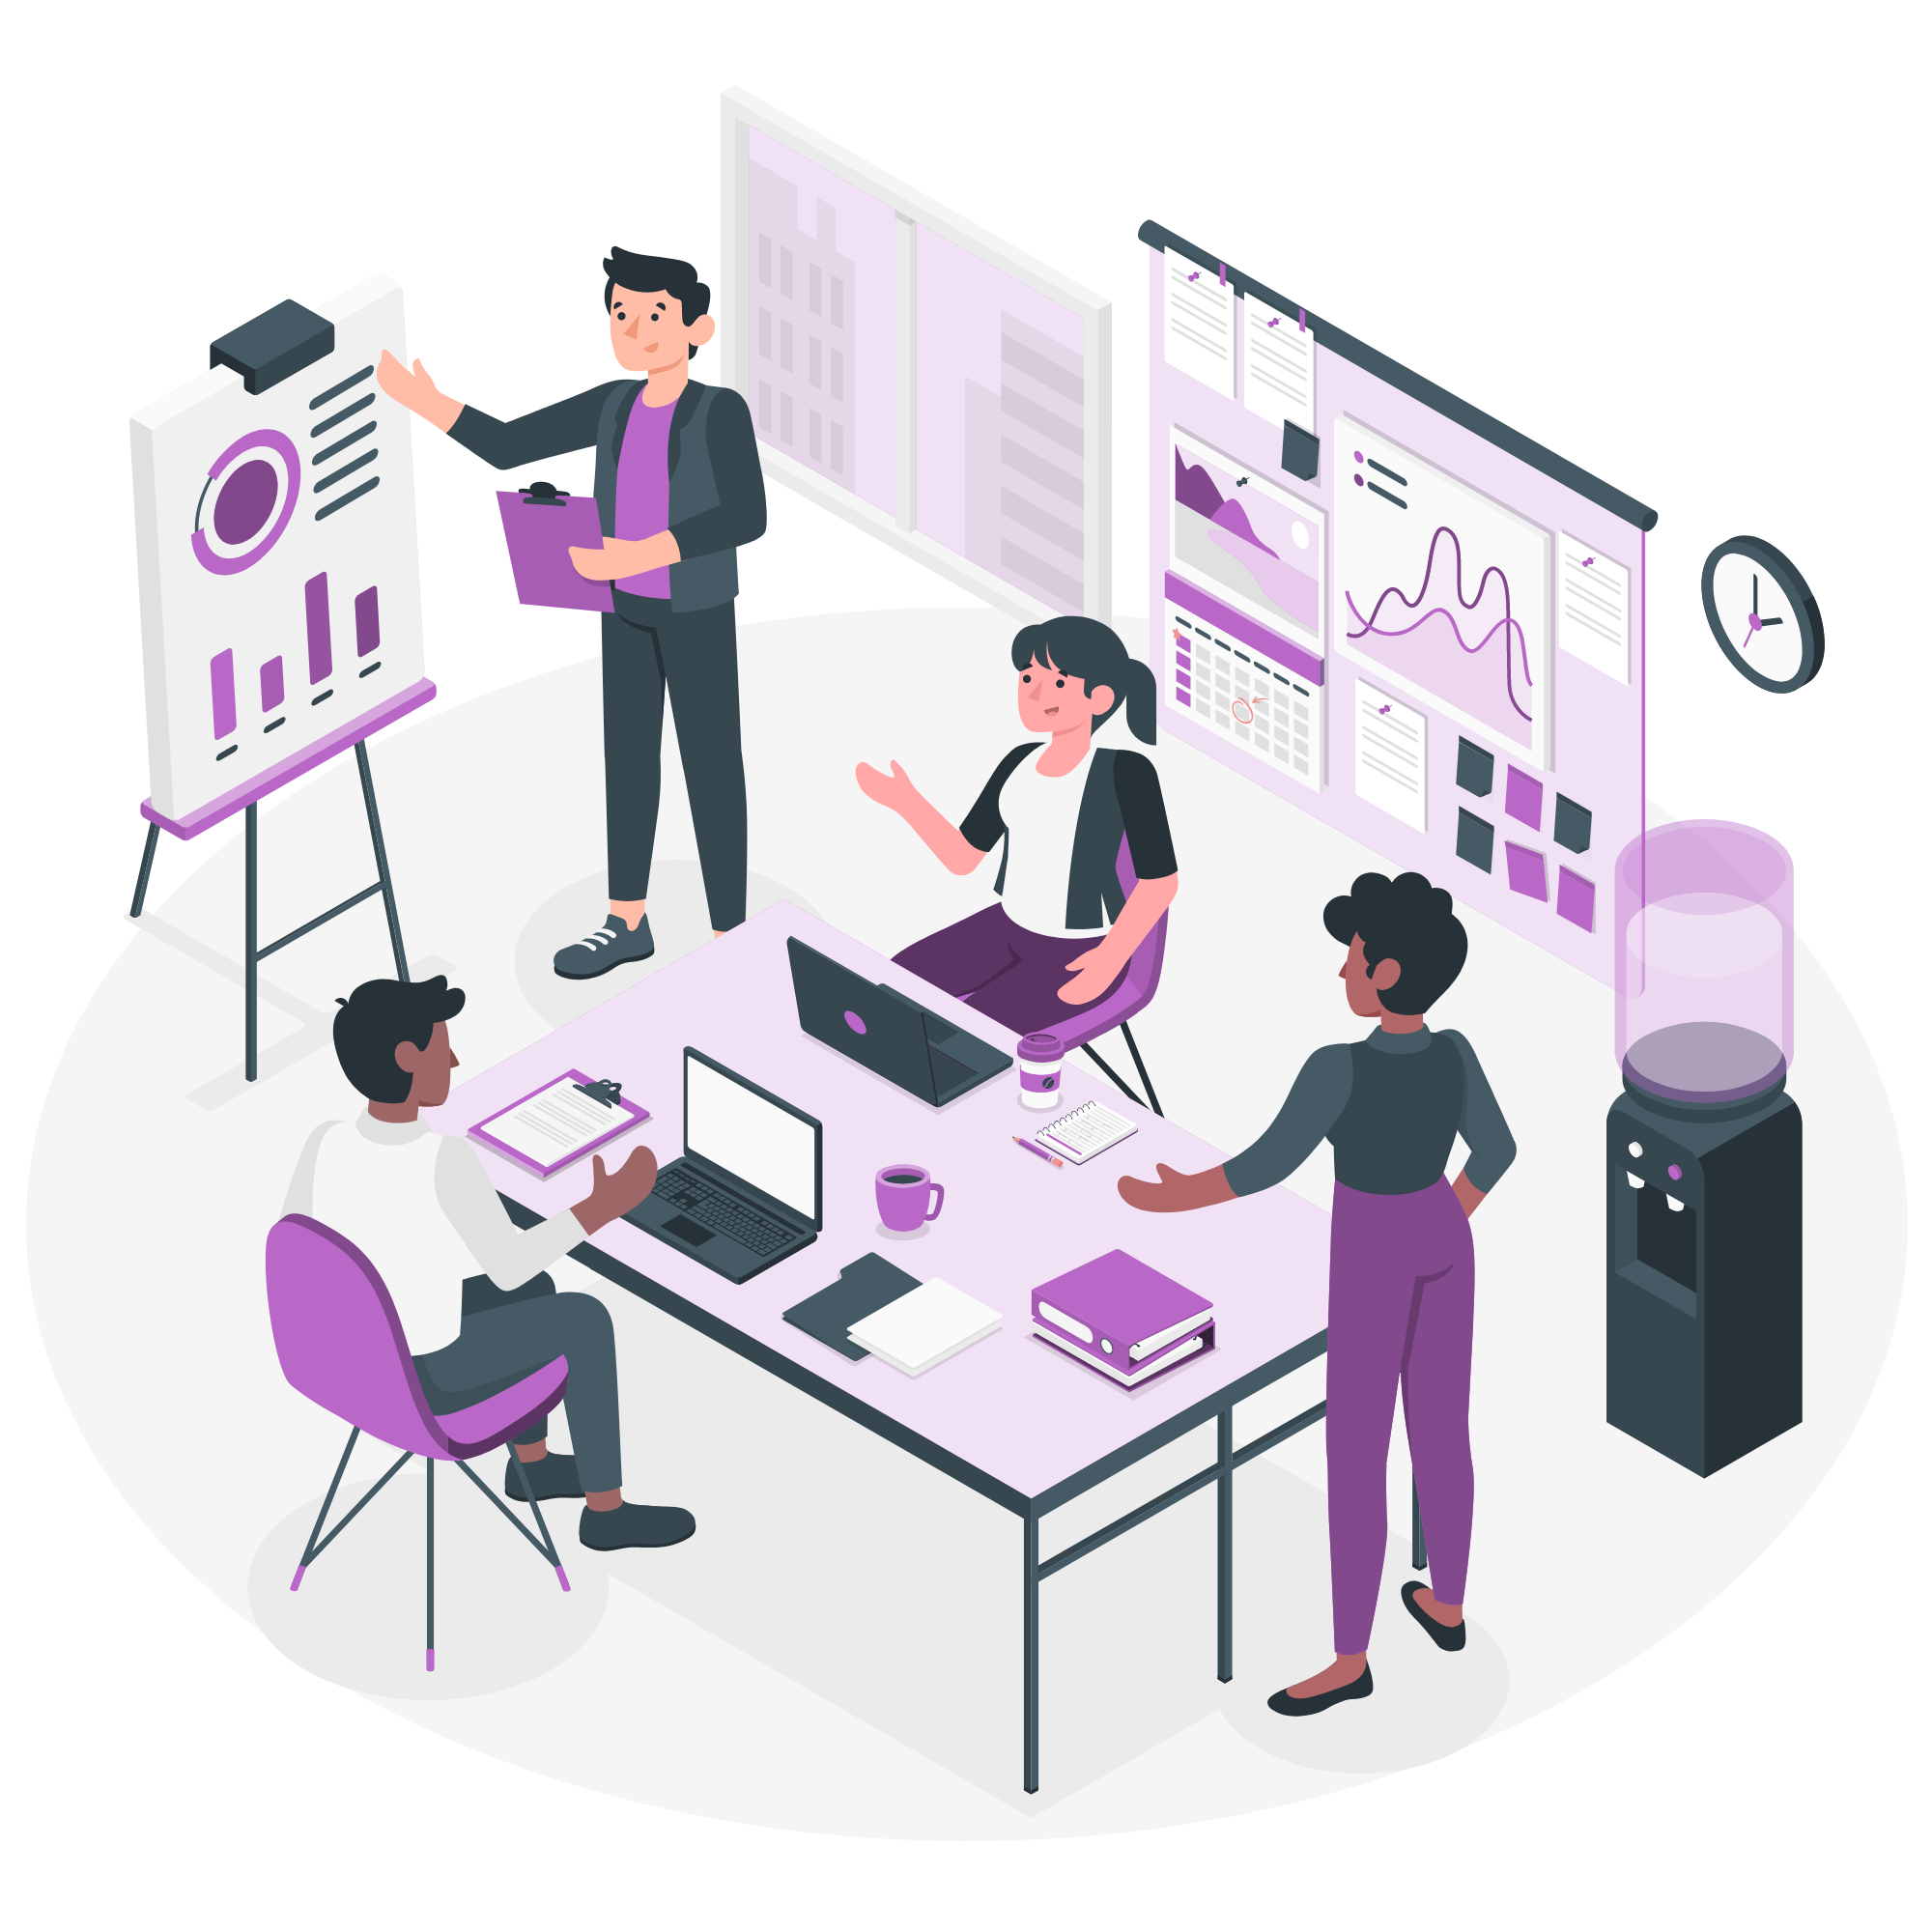

<code style="background:yellow;color:black">About the dataset.</code>

[Click Here to see the attributes](https://www.kaggle.com/imakash3011/customer-personality-analysis)
</code>

<code style="background:yellow;color:black">*Referencing this Article for insights frequently*</code>

[Click here](https://medium.com/@atulsinghp007/customer-segmentation-in-python-using-rfm-analysis-909981833e03)


----

## Objective:

<code style="background:yellow;color:black">Perform clustering to summarize customer segments.</code>

### Import the Libraries

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_theme(style='darkgrid')
sns.set(rc={'figure.figsize':(18,13)})
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from datetime import datetime, date
from mpl_toolkits.mplot3d import Axes3D # 3d plot

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm
from sklearn.preprocessing import LabelEncoder # Turn cat into numeric features

### Read in the file

In [2]:
data = pd.read_csv('marketing_campaign.csv',sep= '\t')

In [3]:
# Sets option to have all columns viewable
pd.options.display.max_columns = None

#### Make a copy of the data 

In [4]:
# Making a copy of the data incase I run into trouble
df = data.copy()

### Examine the data

In [107]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Parent,TotalPurchases,TotalExpenses
0,5524,1957,Bachelors,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,65,0,22,1617
1,2174,1954,Bachelors,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,68,1,4,27
2,4141,1965,Bachelors,In a relationship,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,57,0,20,776
3,6182,1984,Bachelors,In a relationship,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,38,1,6,53
4,5324,1981,PhD,In a relationship,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,41,1,14,422


In [106]:
df.shape

(2212, 31)

In [7]:
# Info about dataset - including any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
# Summary statistics of dataset
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Data Cleaning

In [9]:
# Drop two columns
# Documentation said these were not relevant
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])

In [10]:
# Change the two columns into 'categorical' type
for col in ['Education', 'Marital_Status']:
    df[col]= df[col].astype('category')

# Changing 'Dt_Customer' and 'Year_Birth' to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Year_Birth'] = pd.to_datetime(df.Year_Birth, format='%Y').apply(lambda x: x.strftime('%Y'))

In [11]:
df['Year_Birth']

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2240, dtype: object

In [12]:
df['Income'].mean()

52247.25135379061

In [13]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [14]:
# Look at only column missing data 'Income'
# Create variable and pass pd.isnull() through

In [15]:
missing_data = pd.isnull(df['Income'])

In [16]:
# Display all missing income values
df[missing_data]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,2013-05-11,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,2013-11-07,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0


In [17]:
# Looking at the data, their is no column for employement
# Also, education and number of children seems to be all over the place
# This seems random and with only 24 rows it might be best to drop them.

In [18]:
# dropping all rows that contain NAN
df.dropna(inplace=True)

In [19]:
# Verify
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   object        
 2   Education            2216 non-null   category      
 3   Marital_Status       2216 non-null   category      
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

### Removing Outliers

In [20]:
# Appears to be an outliar in the Income columns

minIncome = df['Income'].min()  
maxIncome = df['Income'].max()

print('The minimal salary is ',minIncome)
print('The max salary is ',maxIncome)

The minimal salary is  1730.0
The max salary is  666666.0


Text(0, 0.5, 'Income')

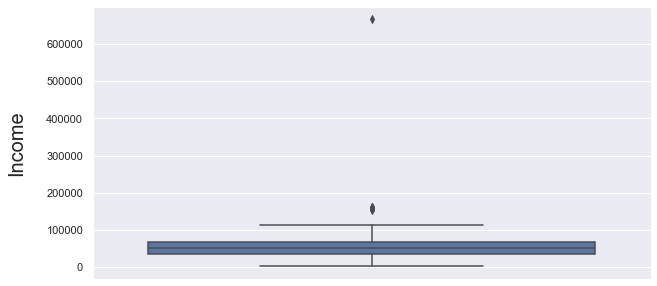

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(y=df['Income'])
plt.ylabel('Income', fontsize=20, labelpad=20)

In [22]:
# Appears to be the one only 600K income so we will drop that one.
money_outlier = df[df['Income'] > 600000]

df = df.drop(money_outlier.index, axis=0)

In [23]:
# Looks through Year_Date for outliers

# Get overall stats on column
df['Year_Birth'].describe()

count     2215
unique      59
top       1976
freq        89
Name: Year_Birth, dtype: object

In [24]:
df.shape

(2215, 27)

### Data Preprocessing

In [25]:
# Rename values in 'Education' column?

In [26]:
df['Education'].replace({'2n Cycle': 'Graduate', 'Basic': 'High School', 'Graduation': 'Bachelors',
                          'Master': 'Masters'}, inplace=True)

In [27]:
# Get a total count of each valye
df['Education'].value_counts()

Bachelors      1115
PhD             481
Masters         365
Graduate        200
High School      54
Name: Education, dtype: int64

In [28]:
# Put into a variable for plotting
eduPlot = df['Education'].value_counts()

In [29]:
# Appears to be an outliar in the Income columns

minIncome = df['Income'].min()  
maxIncome = df['Income'].max()

print('The minimal salary is ',minIncome)
print('The max salary is ',maxIncome)

The minimal salary is  1730.0
The max salary is  162397.0


Text(0, 0.5, 'Income')

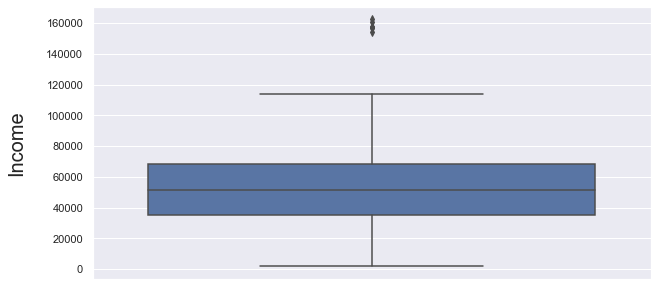

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(y=df['Income'])
plt.ylabel('Income', fontsize=20, labelpad=20)

In [31]:
# Appears to be the one only 600K income so we will drop that one.
money_outlier = df[df['Income'] > 600000]

df = df.drop(money_outlier.index, axis=0)

---

In [32]:
# Looks through Year_Date for outliers

# Get overall stats on column
df['Year_Birth'].describe()

count     2215
unique      59
top       1976
freq        89
Name: Year_Birth, dtype: object

In [33]:
# Check the min and max
df['Year_Birth'].min()

'1893'

In [34]:
# This looks suspicous ^^^^

df['Year_Birth'].max()

# This seems legit ^^^

'1996'

Probably somebody almost 130 is not going to this store. Lets filter some ages and assume anyone born before 1930 is going to this grocery store

In [35]:
age_outlier = df.loc[df['Year_Birth']<'1930']

In [36]:
# This will drop any customers born before 1930 and update dataset
df = df.drop(age_outlier.index, axis=0)

---

### Create columns for:

    1. Age of customer (use the birth column)
    2. Total number of purchases
    3. If customer is a parent

##### Create an Age columns from Year_Birth

In [37]:
# function to create Age column based on 'Year_Birth'
def age(born):
    born = datetime.strptime(born, "%Y").date()
    today = date.today()
    return today.year - born.year
df['Age'] = df['Year_Birth'].apply(age)


##### Plot histogram of Ages

<AxesSubplot:xlabel='Age', ylabel='Count'>

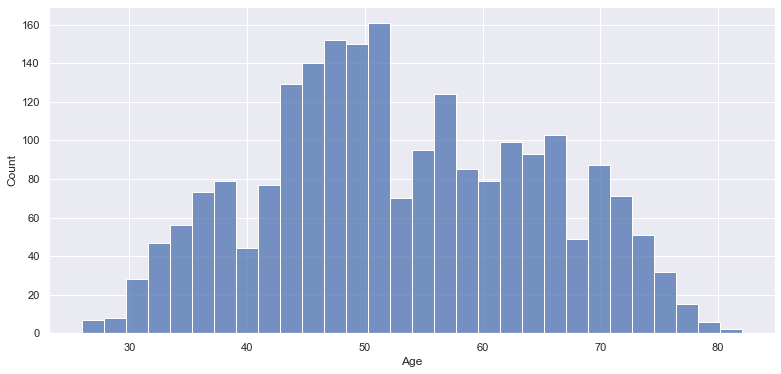

In [38]:
plt.figure(figsize=(13,6))
sns.histplot(data=df, x='Age', bins=30)

---

#### Create new column if customer is a parent

0 ---> No

1 ---> Yes

In [39]:
df['Kidhome'].value_counts()

0    1281
1     885
2      46
Name: Kidhome, dtype: int64

In [40]:
df['Teenhome'].value_counts()

0    1144
1    1017
2      51
Name: Teenhome, dtype: int64

In [41]:
def newcolumn(row):
    if row['Kidhome'] >= 1:
        return 1
    elif row['Teenhome'] >=1:
        return 1
    else:
        return 0  

In [42]:
df['Parent'] = df.apply(lambda row: newcolumn(row), axis=1)

---

## Create a column of TotalPurchases and have it a combination of any purchase column totals

In [43]:
df['TotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

---

## Rename values in the 'Martial_Status' column

In [44]:
df['Marital_Status'].unique()

['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']
Categories (8, object): ['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow', 'YOLO']

Looks like theres an opportunity to consoldate some of these values in 'Martial_Status':
    
    ***Change so status is either single or in a relationship***
  

In [45]:
df['Marital_Status'].replace({'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single',
                             'Together': 'In a relationship', 'Widow':'Single', 'Divorced': 'Single',
                             'Married':'In a relationship'}, inplace=True)

In [46]:
martial_stats = df['Marital_Status'].value_counts()

In [47]:
# Number of single customers vs in a relationship
martial_stats

In a relationship    1428
Single                784
Name: Marital_Status, dtype: int64

Here is a pie graph of the relevant Martial Status


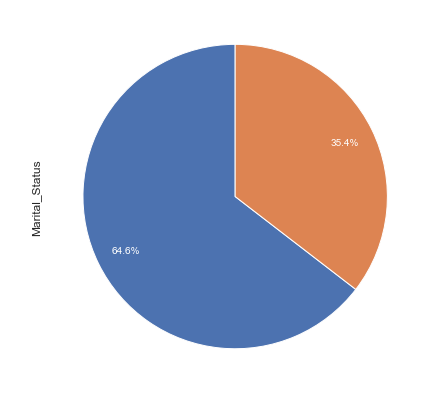

In [48]:
plot = martial_stats.plot.pie(autopct='%1.1f%%',pctdistance=0.8,startangle=90,
                              figsize=(12,7), textprops={'color':"w"})

print("Here is a pie graph of the relevant Martial Status")

## Rename values in MntWines, MntFruits, MntMeatProducts etc

In [49]:
df.rename(columns={'MntWines': 'Wines', 'MntFruits':'Fruits',
                   'MntMeatProducts':'Meat', 'MntFishProducts':'Fish',
                   'MntSweetProducts':'Sweets','MntGoldProds':'Gold'},inplace=True)

In [50]:
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Parent,TotalPurchases
0,5524,1957,Bachelors,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,65,0,22
1,2174,1954,Bachelors,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,68,1,4


---

In [51]:
# Combine all purchases cost into one Totals column
sumTotal = df['Wines'] + df['Sweets'] + df['Meat'] + df['Gold'] + df['Fruits'] + df['Fish']

In [52]:
df['TotalExpenses'] = sumTotal

----

### Using the corr() method

In [53]:
correlations = df.corr()

In [54]:
# This will display a dataframe but will probably be tough to read
df.corr()

,ID,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Parent,TotalPurchases,TotalExpenses
ID,1.000000,0.000905,0.000971,-0.003508,-0.044147,-0.018906,0.010008,-0.003706,-0.022405,-0.004381,-0.008013,-0.040849,-0.017232,-0.000404,-0.011733,-0.008610,-0.035668,-0.023692,-0.004441,-0.017989,-0.014901,0.031839,-0.021112,-0.005086,-0.001764,-0.012016,-0.014327
Income,0.000905,1.000000,-0.514523,0.034565,0.007965,0.688209,0.507354,0.692279,0.520040,0.523599,0.388299,-0.108207,0.459265,0.696589,0.631424,-0.650257,-0.015152,0.219633,0.395569,0.327524,0.104036,-0.027900,0.161387,0.199977,-0.403132,0.742691,0.792740
Kidhome,0.000971,-0.514523,1.000000,-0.039066,0.010623,-0.497203,-0.373258,-0.439031,-0.388643,-0.377843,-0.354922,0.216594,-0.372327,-0.504598,-0.501863,0.447258,0.016135,-0.162111,-0.204582,-0.174261,-0.081911,0.037067,-0.077901,-0.237497,0.520355,-0.573144,-0.557949
Teenhome,-0.003508,0.034565,-0.039066,1.000000,0.014392,0.003945,-0.175905,-0.261134,-0.205235,-0.163107,-0.018579,0.386805,0.162239,-0.112477,0.049212,0.130985,-0.042797,0.038168,-0.190119,-0.145198,-0.015633,0.007746,-0.154402,0.361932,0.587993,0.038248,-0.137964
Recency,-0.044147,0.007965,0.010623,0.014392,1.000000,0.015981,-0.005257,0.022914,0.000788,0.025244,0.018148,0.002591,-0.005680,0.024197,-0.000460,-0.018965,-0.032361,0.017520,0.000233,-0.021147,-0.001429,0.005713,-0.200114,0.015694,0.002189,0.007462,0.020479
Wines,-0.018906,0.688209,-0.497203,0.003945,0.015981,1.000000,0.385844,0.568081,0.396915,0.389583,0.391461,0.009117,0.553663,0.634237,0.640219,-0.321616,0.061360,0.373349,0.472889,0.351610,0.206309,-0.036420,0.246320,0.164615,-0.341994,0.757251,0.892996
Fruits,0.010008,0.507354,-0.373258,-0.175905,-0.005257,0.385844,1.000000,0.546740,0.593038,0.571474,0.393459,-0.134191,0.302301,0.485611,0.459875,-0.417741,0.014644,0.006598,0.208990,0.192417,-0.009924,-0.002956,0.123007,0.013447,-0.410657,0.519836,0.612129
Meat,-0.003706,0.692279,-0.439031,-0.261134,0.022914,0.568081,0.546740,1.000000,0.572986,0.534624,0.357556,-0.121128,0.306841,0.733787,0.486349,-0.539194,0.018416,0.091677,0.375252,0.313379,0.043549,-0.021017,0.237966,0.033622,-0.574147,0.634341,0.845543
Fish,-0.022405,0.520040,-0.388643,-0.205235,0.000788,0.396915,0.593038,0.572986,1.000000,0.583484,0.426299,-0.143147,0.299428,0.532241,0.457885,-0.446151,-0.000276,0.016058,0.194793,0.261712,0.002322,-0.019098,0.108135,0.041154,-0.449596,0.536790,0.641884
Sweets,-0.004381,0.523599,-0.377843,-0.163107,0.025244,0.389583,0.571474,0.534624,0.583484,1.000000,0.356754,-0.121395,0.333608,0.494623,0.455150,-0.422289,0.001660,0.029206,0.258417,0.245113,0.010142,-0.020569,0.116059,0.021516,-0.402064,0.533280,0.606652


<AxesSubplot:>

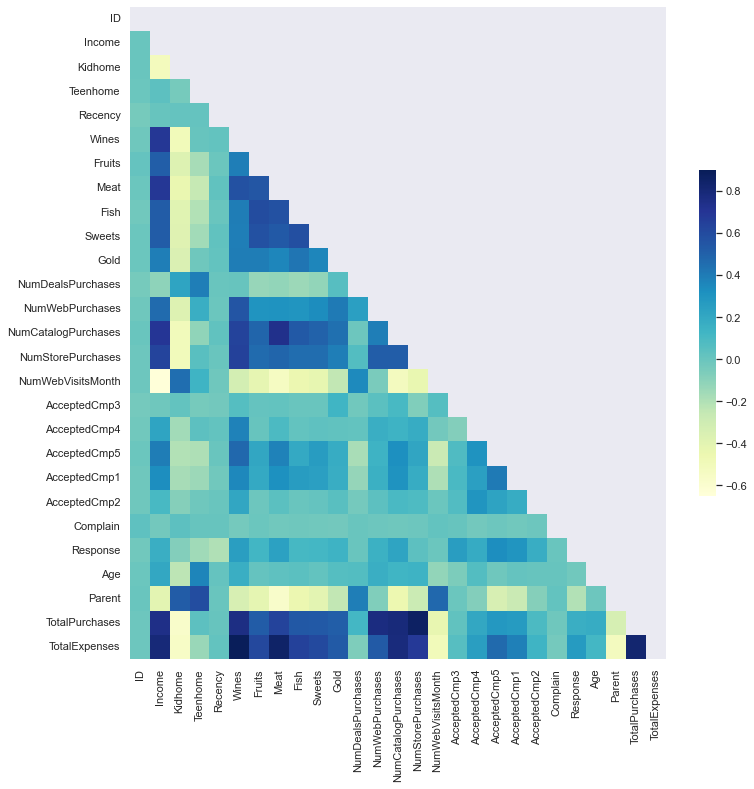

In [55]:
plt.figure(figsize=(12,12))
#cmap = sns.light_palette('green')

mask = np.zeros_like(correlations, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlations, 
            cmap='YlGnBu',
            vmax=.9, 
            mask = mask,
            cbar_kws={'shrink': 0.5})

### Observations:

It appears their are some correlations, for example Income and TotalExpenses, TotalPurchases.

Also some correlations between certain items.

Another correlation is Meats to total expenses, not surprised as meat cost alot

### Visualizing of data 

Countplot of Married_Statues with a hue of Education


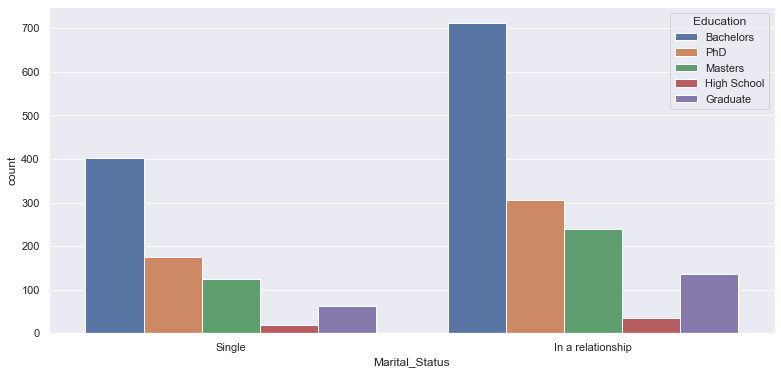

In [56]:
plt.figure(figsize=(13,6))
sns.countplot(x='Marital_Status',hue='Education', data=df)

print('Countplot of Married_Statues with a hue of Education')

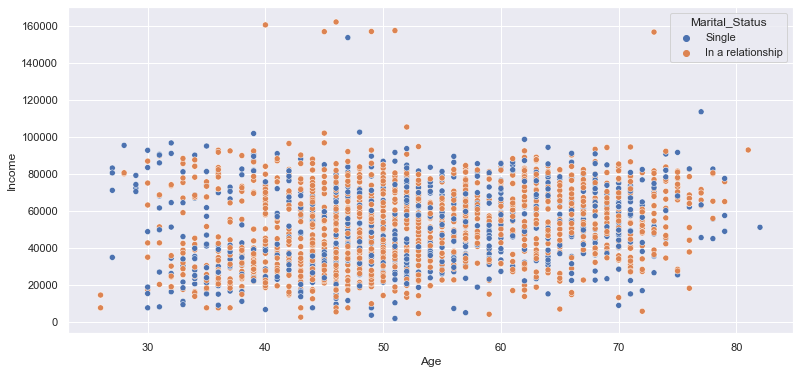

In [57]:
# Scatter plot with Age and Income, hue of relationship status
plt.figure(figsize=(13,6))
ax = sns.scatterplot(data=df, x='Age', y='Income', hue='Marital_Status')

Not much of any correlation between Income and Age.

<AxesSubplot:xlabel='Marital_Status', ylabel='Income'>

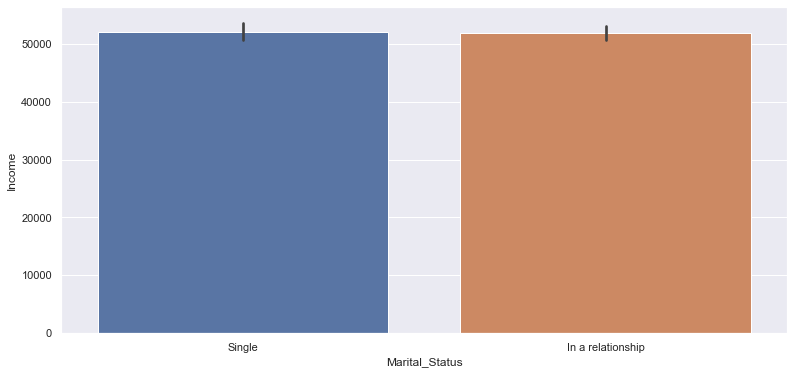

In [58]:
# Barplot to represent income to martial status
plt.figure(figsize=(13,6))
sns.barplot(x='Marital_Status', y='Income', data=df)

<AxesSubplot:xlabel='Marital_Status', ylabel='TotalExpenses'>

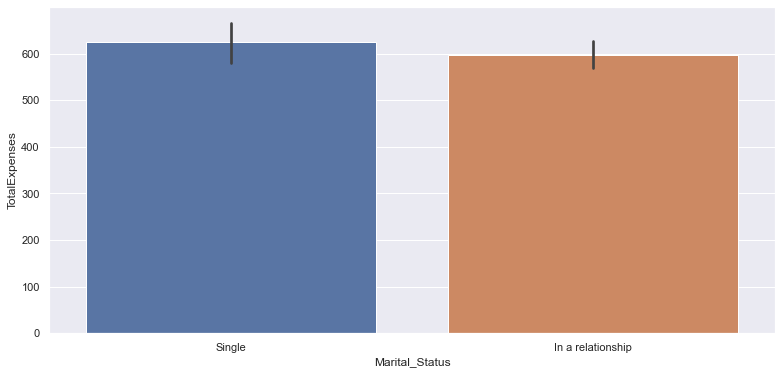

In [59]:
# Barplot to represent marital_status to totalexpenses
plt.figure(figsize=(13,6))
sns.barplot(x='Marital_Status', y='TotalExpenses', data=df)

The two charts above tell us that marital_status has no major correlation between income and spending at the store. Which means we can drop it when we create our model, kinda surprised we ended being able to drop this column.

<AxesSubplot:xlabel='Income', ylabel='TotalExpenses'>

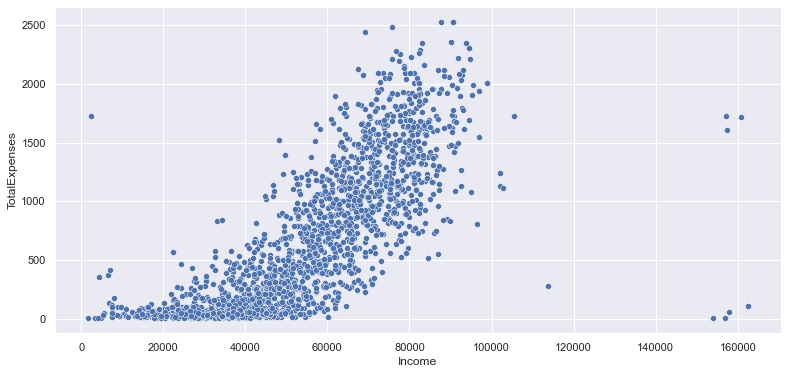

In [60]:
# Scatter plot with Income vs Total Expenses

plt.figure(figsize=(13,6))
sns.scatterplot(data=df, x='Income', y='TotalExpenses')

Clearly there is a major correlation between how much money a customer makes and how much they have spent.

<AxesSubplot:xlabel='Parent', ylabel='count'>

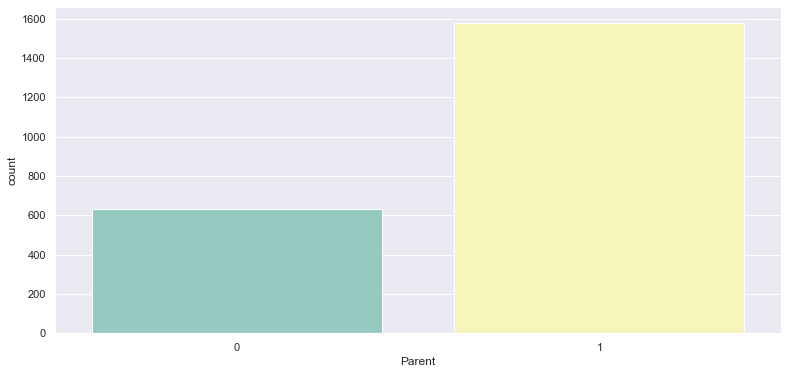

In [61]:
# Parent vs Non Parents
plt.figure(figsize=(13,6))
sns.countplot(x="Parent", data=df, palette='Set3')

Slightly over 600 are not parents while almost 1600 people are parents of at least one child

In [62]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Parent,TotalPurchases,TotalExpenses
0,5524,1957,Bachelors,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,65,0,22,1617
1,2174,1954,Bachelors,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,68,1,4,27
2,4141,1965,Bachelors,In a relationship,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,57,0,20,776
3,6182,1984,Bachelors,In a relationship,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,38,1,6,53
4,5324,1981,PhD,In a relationship,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,41,1,14,422


Text(0.5, 1.0, 'Total Spent vs Income as Parent vs Not')

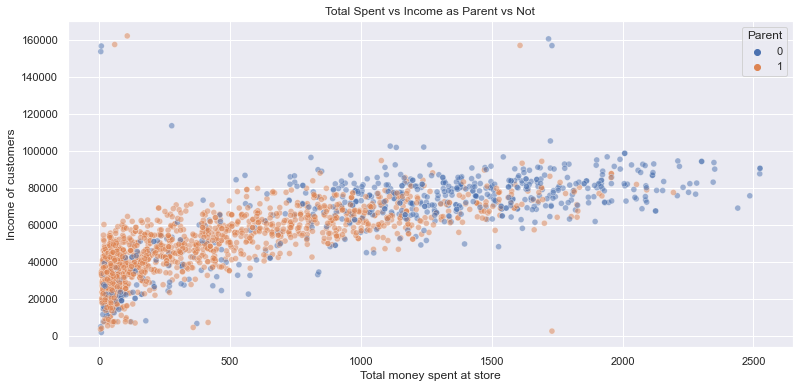

In [63]:
plt.figure(figsize=(13,6))
sns.scatterplot(data=df, x='TotalExpenses', 
                         y='Income', 
                         sizes="pop", 
                         hue='Parent',
                         alpha=0.5)

plt.xlabel('Total money spent at store')
plt.ylabel('Income of customers')
plt.title('Total Spent vs Income as Parent vs Not')

#### I find this interesting as there are clearly less parents. It appears that according to this data that non parents have spent more total at the store.

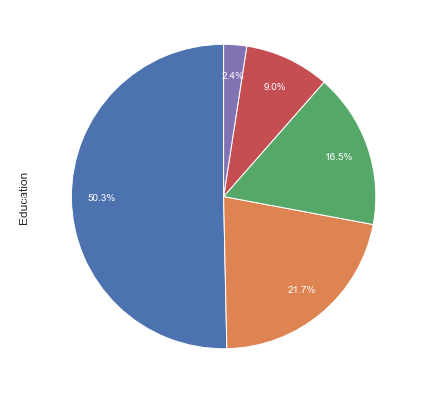

In [64]:
plot = eduPlot.plot.pie(autopct='%1.1f%%',pctdistance=0.8,startangle=90,
                              figsize=(12,7), textprops={'color':"w"})

# Plot Education column

In [65]:
# Time to make a copy of data for sake keeping
data_df = df.copy()

## Clustering

Dropping columns that will not give value to the segmentation

In [66]:
data_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Parent,TotalPurchases,TotalExpenses
0,5524,1957,Bachelors,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,65,0,22,1617
1,2174,1954,Bachelors,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,68,1,4,27
2,4141,1965,Bachelors,In a relationship,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,57,0,20,776
3,6182,1984,Bachelors,In a relationship,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,38,1,6,53
4,5324,1981,PhD,In a relationship,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,41,1,14,422


In [67]:
drop = ['ID','Year_Birth', 'Dt_Customer', 'Wines', 'Fruits', 'Meat',
        'Fish', 'Sweets', 'Gold', 'AcceptedCmp1', 'AcceptedCmp2',
        'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response', 'Marital_Status']

In [68]:
# Dropping the columns to data_df
data_df.drop(columns=drop, axis=1, inplace=True)

In [69]:
# Viewing the updated size of the dataset
data_df.shape

(2212, 14)

#### Using Labelencoder to convert categorical data


Need to transform 'Education' from categorical to numeric data type.
Sklearn library has a tool called LabelEncoder to help with this.

In [70]:
label_encoder = LabelEncoder()

In [71]:
# Transform Education to numeric
data_df['Education'] = label_encoder.fit_transform(data_df['Education'])

### Normalizing the data
##### Helps with the alorgithm

##### Using the 'StandardScaler' function will perform normalization over the dataset

In [72]:
x = data_df.values
x = np.nan_to_num(x)

In [73]:
sc = StandardScaler()

In [74]:
cluster = sc.fit_transform(x)
print('Samples of customer data: ', cluster[:3])

Samples of customer data:  [[-0.88312891  0.28710487 -0.82275354 -0.92969866  0.31035323  0.35102992
   1.42686452  2.50360729 -0.55581429  0.69218052  1.01835202 -1.58113883
   1.30946091  1.67624537]
 [-0.88312891 -0.26088203  1.04002111  0.90809708 -0.38081349 -0.16870113
  -1.12641992 -0.57133959 -1.17116024 -0.13254521  1.27478522  0.63245553
  -1.18922094 -0.96329696]
 [-0.88312891  0.9131964  -0.82275354 -0.92969866 -0.79551352 -0.68843217
   1.42686452 -0.22967882  1.29022356 -0.54490807  0.33453017 -1.58113883
   1.03182959  0.28011009]]


### Selecting the number of cluster

#### WCSS

In [75]:
wcss = []

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [76]:
kmeans.inertia_

53572547870.74019

In [77]:
wcss

[1025434877226.0317,
 319215162264.70917,
 183128111109.11682,
 122355559551.02654,
 81066818546.51152,
 53572547870.74019]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

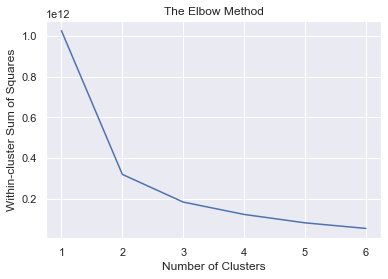

In [78]:
number_clusters = range(1,7)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')

##### Three clusters should be optimal.

## Model: With KMeans Algorithm

In [79]:
clusters = 3

In [80]:
model = KMeans(init = 'k-means++',
              n_clusters = clusters,
              n_init= 12)

model.fit(x)
labels = model.labels_
print(labels[:100])

[2 2 1 0 2 2 2 0 0 0 0 2 2 0 1 2 0 1 0 0 0 2 1 2 0 2 0 1 0 0 2 2 1 2 1 0 2
 2 1 0 0 0 1 0 2 1 1 1 0 1 1 1 1 0 2 1 1 2 1 1 0 0 1 1 1 1 1 2 0 0 1 1 0 2
 0 0 0 0 1 0 0 2 1 2 2 0 0 2 2 1 2 2 0 1 1 1 0 2 2 0]


In [81]:
data_df['ClusterNum'] = labels
data_df.head()

,Education,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Parent,TotalPurchases,TotalExpenses,ClusterNum
0,0,58138.0,0,0,58,3,8,10,4,7,65,0,22,1617,2
1,0,46344.0,1,1,38,2,1,1,2,5,68,1,4,27,2
2,0,71613.0,0,0,26,1,8,2,10,4,57,0,20,776,1
3,0,26646.0,1,0,26,2,2,0,4,6,38,1,6,53,0
4,4,58293.0,1,0,94,5,5,3,6,5,41,1,14,422,2


This created a new attribute 'Cluster_Num' in the dataset. Which represents which cluster each row belongs too.

In [82]:
# Check out the mean values of new attribute
data_df.groupby('ClusterNum').mean()

,Education,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Parent,TotalPurchases,TotalExpenses
ClusterNum,,,,,,,,,,,,,,
0,1.340970,28369.243935,0.808625,0.314016,48.521563,2.142857,2.159030,0.526954,3.083558,6.911051,48.799191,0.845013,5.769542,95.029650
1,1.489796,76958.275510,0.086006,0.351312,49.036443,1.610787,5.399417,5.453353,8.409621,3.158892,54.466472,0.376093,19.262391,1282.889213
2,1.663265,52410.118622,0.405612,0.822704,49.475765,3.121173,4.766582,2.269133,6.105867,5.709184,55.936224,0.886480,13.141582,500.896684


In [83]:
# Copy of data_df now its scaled
scaled_df = data_df.copy()

# Aiming for 3 cluster
kmeans = KMeans(3)
# Fit the data
kmeans.fit(scaled_df)

KMeans(n_clusters=3)

In [84]:
# Create copy of scaled_df
cluster_df = scaled_df.copy()
# Taking note of the predited cluster 
cluster_df['Cluster_Pred'] = kmeans.fit_predict(scaled_df)

Scatter plot between Income and Total Expenses features.


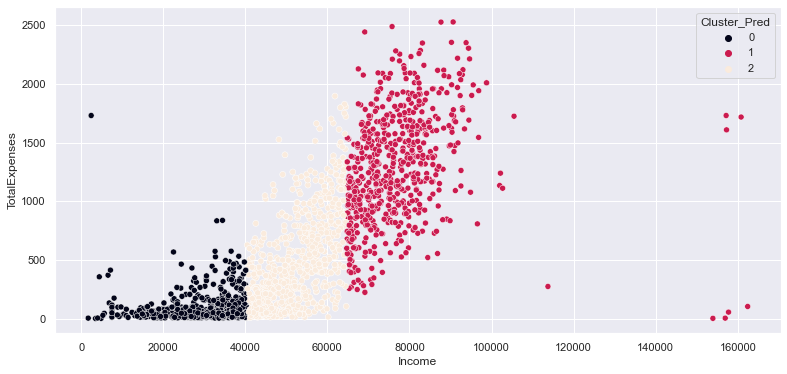

In [85]:
# Ploting the data using two features.
plt.figure(figsize=(13,6))
sns.scatterplot(x='Income', y='TotalExpenses',
                data=cluster_df,
                hue='Cluster_Pred',
                palette='rocket')
print("Scatter plot between Income and Total Expenses features.")

Income with Number of web purchases, can see a slight trend with higer income meaning more webpurchases, not as high as I would expect.


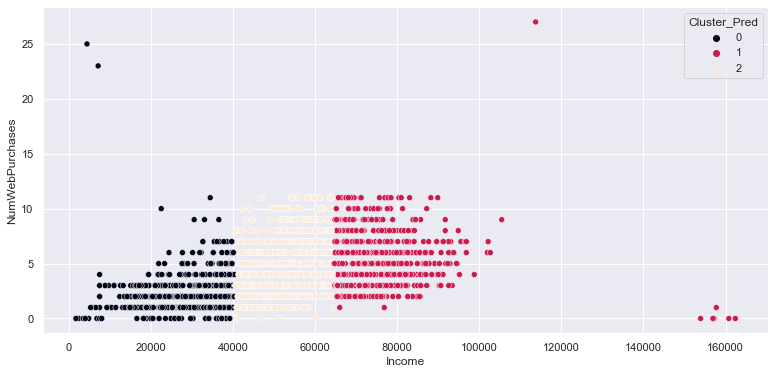

In [86]:
plt.figure(figsize=(13,6))
sns.scatterplot(x='Income', y='NumWebPurchases', 
                hue='Cluster_Pred', 
                data=cluster_df,
                palette='rocket')
print("Income with Number of web purchases, can see a slight trend with higer income meaning more webpurchases, not as high as I would expect.")

Income with Number of catalog purchases, can also see a slight trend here as well


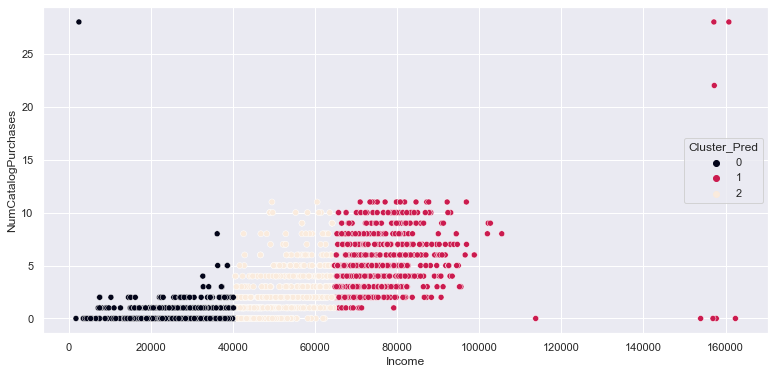

In [87]:
plt.figure(figsize=(13,6))
sns.scatterplot(x='Income', y='NumCatalogPurchases', 
                hue='Cluster_Pred', 
                data=cluster_df,
                palette='rocket')
print("Income with Number of catalog purchases, can also see a slight trend here as well")

Income with Number of purchases in the store, the higer the income the more purchases.Shocker.


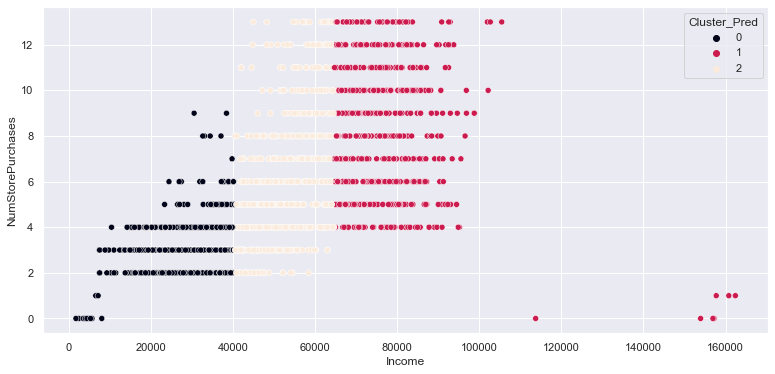

In [88]:
plt.figure(figsize=(13,6))
sns.scatterplot(x='Income', y='NumStorePurchases', 
                hue='Cluster_Pred', 
                data=cluster_df,
                palette='rocket')
print("Income with Number of purchases in the store, the higer the income the more purchases.Shocker.")

Income with Number of purchases in the store, the higer the income the more purchases.Shocker.


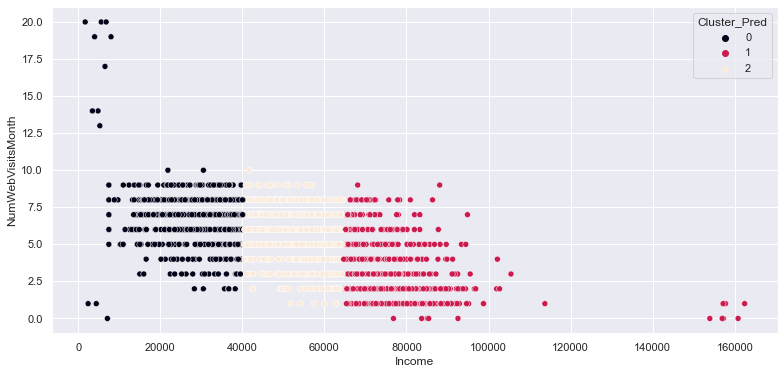

In [89]:
plt.figure(figsize=(13,6))
sns.scatterplot(x='Income', y='NumWebVisitsMonth', 
                hue='Cluster_Pred', 
                data=cluster_df,
                palette='rocket')
print("Income with Number of purchases in the store, the higer the income the more purchases.Shocker.")

In [90]:
cluster_df.head(3)

,Education,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Parent,TotalPurchases,TotalExpenses,ClusterNum,Cluster_Pred
0,0,58138.0,0,0,58,3,8,10,4,7,65,0,22,1617,2,2
1,0,46344.0,1,1,38,2,1,1,2,5,68,1,4,27,2,2
2,0,71613.0,0,0,26,1,8,2,10,4,57,0,20,776,1,1


## Profiling

##### Create a 3D scatter to help profile our clusters

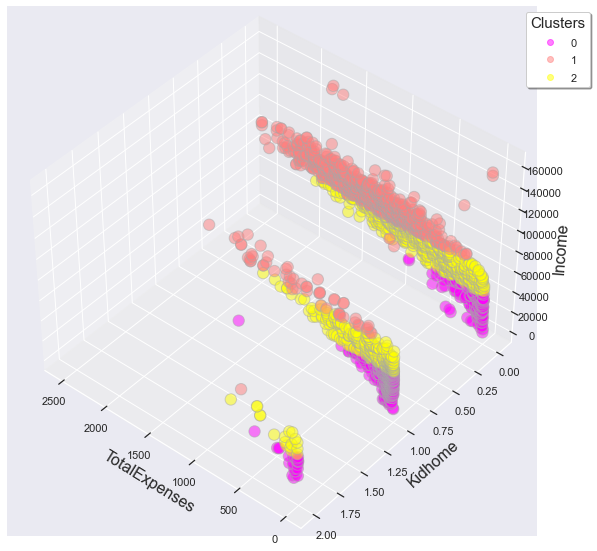

In [91]:
fig = plt.figure(figsize=(8,8))
fig = plt.figure(1)
plt.clf()

ax = Axes3D(fig,
           rect = [0, 0, 0.92, .98],
           elev = 42,
           azim = 130)
plt.cla()
sc = ax.scatter(cluster_df['TotalExpenses'],cluster_df['Kidhome'], cluster_df['Income'],
                      c=cluster_df['Cluster_Pred'],
                      s=130,
                      cmap='spring',
                      alpha=0.5,
                      edgecolor='darkgrey')
ax.set_xlabel('TotalExpenses', fontsize=16)
ax.set_ylabel('Kidhome', fontsize=16)
ax.set_zlabel('Income', fontsize=16)
plt.legend(*sc.legend_elements(),
                  bbox_to_anchor = (1.11, 1),
                  title='Clusters',
                  title_fontsize = 15,
                  shadow=True,
                  facecolor = 'white')
plt.show()

In [92]:
#cluster_df['ClusterNum'] = kmeans.labels_

In [93]:
# Add cluster labels
profile_overall = cluster_df.describe().T

In [94]:
# Use mean, summarize the data
profile_overall['Overall Dataset'] = profile_overall[['mean']]
profile_overall = profile_overall[['Overall Dataset']]

In [95]:
# Cluster ID levels
cluster_summary = cluster_df.groupby('ClusterNum').describe().T.reset_index()
cluster_summary = cluster_summary.rename(columns={'level_0':'Column', 'level_1':'Metric'})

In [96]:
cluster_summary.head()

ClusterNum,Column,Metric,0,1,2
0,Education,count,742.000000,686.000000,784.000000
1,Education,mean,1.340970,1.489796,1.663265
2,Education,std,1.582945,1.747335,1.752612
3,Education,min,0.000000,0.000000,0.000000
4,Education,25%,0.000000,0.000000,0.000000


In [97]:
# Summarizing each feature
cluster_summary = cluster_summary[cluster_summary['Metric'] == "mean"]
cluster_summary = cluster_summary.set_index('Column')

In [98]:
cluster_summary.head(20)

ClusterNum,Metric,0,1,2
Column,,,,
Education,mean,1.340970,1.489796,1.663265
Income,mean,28369.243935,76958.275510,52410.118622
Kidhome,mean,0.808625,0.086006,0.405612
Teenhome,mean,0.314016,0.351312,0.822704
Recency,mean,48.521563,49.036443,49.475765
NumDealsPurchases,mean,2.142857,1.610787,3.121173
NumWebPurchases,mean,2.159030,5.399417,4.766582
NumCatalogPurchases,mean,0.526954,5.453353,2.269133
NumStorePurchases,mean,3.083558,8.409621,6.105867


## Summary

From this most current dataset you can come to your own conclusion and/or perform deeper analysis. For now it appears cluster 2 would be a lower education / lower income level with having kids.
Cluster 1 also has children but with a higer income/education level.
Cluster 0 tends to have the highest income and with that they spend the most, which is also the cluster that has the least amount of children across the board.